In [ ]:
!pip install osmnx
!pip install networkx
!pip install memory_profiler

In [ ]:
import heapq
from queue import PriorityQueue
import random
import time
import networkx as nx
import numpy as np
import osmnx as ox
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
from memory_profiler import profile,memory_usage

/usr/local/lib/python3.10/dist-packages/osmnx/_overpass.py:211: UserWarning: This area is 11 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


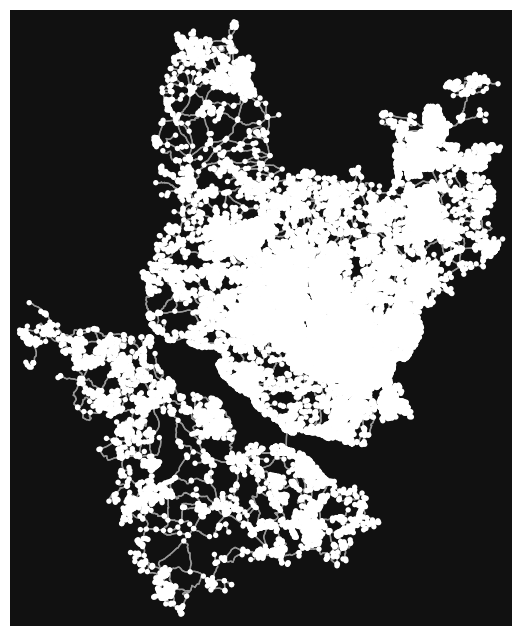

In [ ]:
place = 'Dhaka, Bangladesh'
g = ox.graph_from_place(place, network_type='drive')
# Plot the graph
fig, ax = ox.plot_graph(g)

In [ ]:
source = list(g.nodes())[0]
target = list(g.nodes())[len(list(g.nodes()))-1]
dis = 0

In [ ]:
def getLocationName(node):
    geolocator = Nominatim(user_agent="http")
    latitude = node['y']
    longitude = node['x']
    location = geolocator.reverse([latitude, longitude], exactly_one=True)
    return location.address

In [ ]:
def straight_dis(node1, node2):
    dx = g.nodes[node1]['x'] - g.nodes[node2]['x']
    dy = g.nodes[node1]['y'] - g.nodes[node2]['y']
    return (dx*dx + dy*dy)**0.5

In [ ]:
def shortest_dis(source, target):
      return nx.shortest_path_length(g, source, target, weight='length')

In [ ]:
#Risk Factor
def rf():
    return random.uniform(0.1, 0.9)

In [ ]:
# h(n) function
def Heuristic(source,target, w = 1):
    h = shortest_dis(source, target)
    return w*(h + rf()*h)

In [ ]:
bfs_hit = []
def best_first_search(graph, source, goal):

    explored = set()
    pq = PriorityQueue()
    pq.put((0, source))
    parent = {}
    parent[source] = None

    while not pq.empty():
        _, u = pq.get()
        if u is not None and parent[u] is not None:
            bfs_hit.append((parent[u], u))
        if u==goal:
            path = []
            while u is not None:
                path.append(u)
                u = parent[u]
            return path[::-1]

        explored.add(u)
        for v in graph.neighbors(u):
            if v not in explored and v not in pq.queue:
                pq.put((Heuristic(v, goal), v))
                parent[v] = u
    return None

In [ ]:
astar_hit = []
def astar(graph, source, goal):

    fn = {node: float('inf') for node in g} # actual(upto node) + estimated(node to goal)
    fn[source] = Heuristic(source, goal)

    gn = {node: float('inf') for node in g}  # actual(upto node)
    gn[source] = 0

    pq = PriorityQueue()
    pq.put((fn[source], source))
    parent = {}
    parent[source] = None

    while not pq.empty():
        ffn, u = pq.get()
        if u is not None and parent[u] is not None:
            astar_hit.append((parent[u], u))
        if u==goal:
            path = []
            while u is not None:
                path.append(u)
                u = parent[u]
            return path[::-1]
        for v in graph.neighbors(u):
            actual = gn[u] + shortest_dis(u, v)
            if actual<gn[v]:
                parent[v] = u
                gn[v] = actual
                fn[v] = gn[v] + Heuristic(v, goal)
                pq.put((fn[v], v))

    return None

In [ ]:
wstar_hit = []
def w_astar(graph, source, goal):

    fn = {node: float('inf') for node in g} # actual(upto node) + estimated(node to goal)
    fn[source] = Heuristic(source, goal)

    gn = {node: float('inf') for node in g}  # actual(upto node)
    gn[source] = 0

    pq = PriorityQueue()
    pq.put((fn[source], source))
    parent = {}
    parent[source] = None

    while not pq.empty():
        ffn, u = pq.get()
        if u is not None and parent[u] is not None:
            wstar_hit.append((parent[u], u))
        if u==goal:
            path = []
            while u is not None:
                path.append(u)
                u = parent[u]
            return path[::-1]
        for v in graph.neighbors(u):
            actual = gn[u] + shortest_dis(u, v)
            if actual<gn[v]:
                parent[v] = u
                gn[v] = actual
                fn[v] = gn[v] + Heuristic(v, goal, 3)
                pq.put((fn[v], v))

    return None

In [ ]:
def memory_comparison(mem_consumed):
      #plot memory usage with x axis as time 0.1 difference
      fig = plt.figure(figsize = (10, 6))

      plt.plot(np.linspace(0.1,
                        len(mem_consumed[0])/10,
                        len(mem_consumed[0])),
                    mem_consumed[0],
                    label='BFS',
                    color='red')

      plt.plot(np.linspace(0.1,
                        len(mem_consumed[1])/10,
                        len(mem_consumed[1])),
                mem_consumed[1],
                label='A*',
                color='green')

      plt.plot(np.linspace(0.1,
                           len(mem_consumed[2])/10,
                           len(mem_consumed[2])),
                mem_consumed[2],
                label='Weighted A*',
                color='yellow')

      plt.xlabel('Time (sec)')
      plt.ylabel('Memory (MB)')
      plt.title('Memory Usage')
      plt.legend()
      plt.show()

In [ ]:
def time_comparison(times):
      fig = plt.figure(figsize = (10, 6))
      plt.bar(['BFS', 'A*', 'Weighted A*'],
              times,
              color=['red', 'green', 'yellow']
            )

      plt.xlabel('Algorithm')
      plt.ylabel('Time (s)')
      plt.title('Time Comparison (BFS vs A* vs Weighted A*)')
      plt.show()


Starts from Bhatiapara Gol Chattar, ভাটিয়াপাড়া, কাশিয়ানী, কাশিয়ানী উপজেলা, গোপালগঞ্জ জেলা, ঢাকা বিভাগ, বাংলাদেশ
Target place পাংশা, পাংশা উপজেলা, রাজবাড়ী জেলা, ঢাকা বিভাগ, 7720, বাংলাদেশ

BEST FIRST SEARCH:
 Memory:  [3482.203125, 3482.20703125, 3482.25390625, 3482.26953125, 3482.26953125, 3482.36328125, 3482.36328125, 3482.36328125, 3482.36328125, 3482.36328125, 3482.36328125, 3482.36328125, 3482.36328125, 3482.36328125, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875, 3482.421875

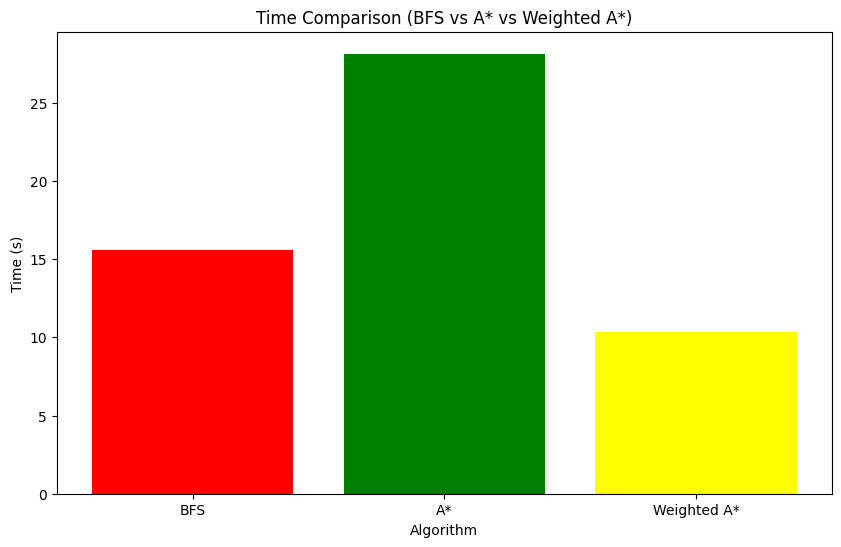

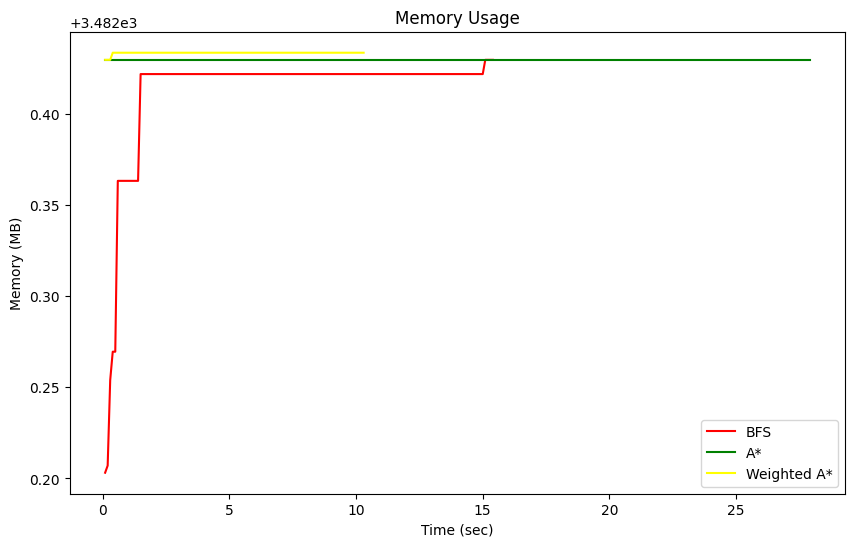

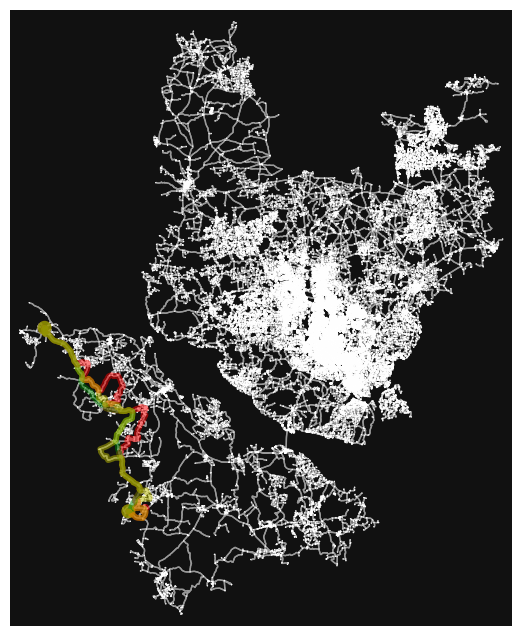

BFS


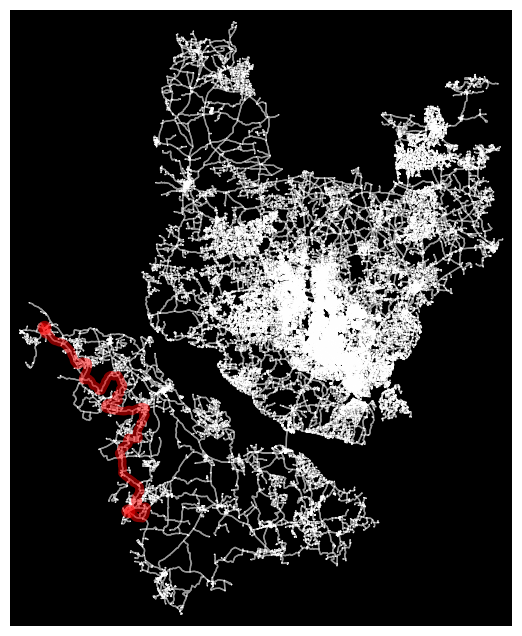

A*


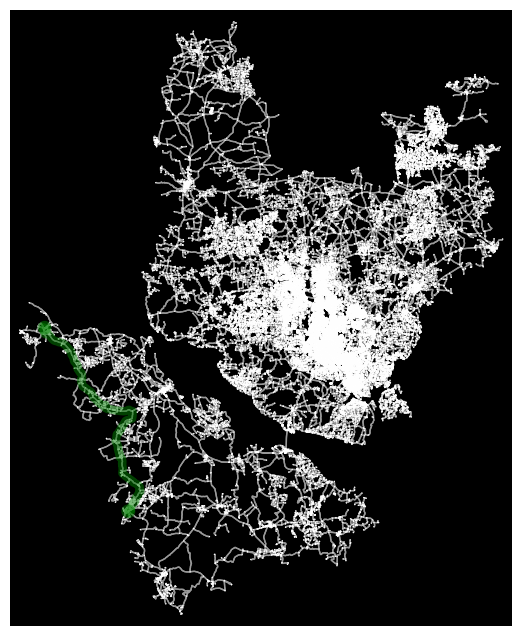

Weighted A*


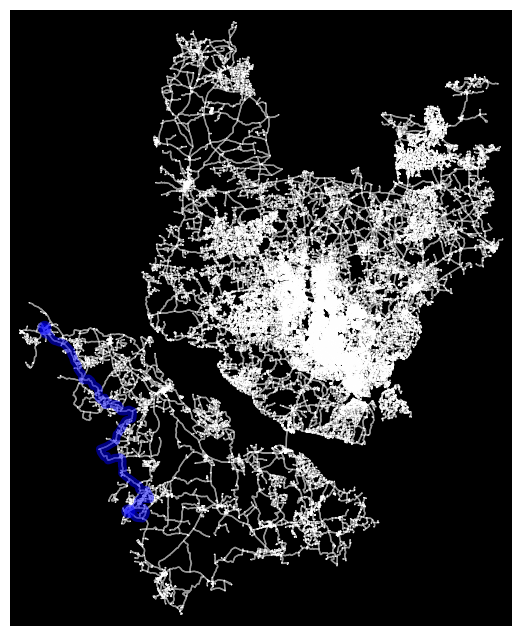

In [ ]:
if __name__ == '__main__':
    print(f"Starts from {getLocationName(g.nodes[source])}")
    print(f"Target place {getLocationName(g.nodes[target])}")


    times = []
    memory = []
    paths = []


    ## BFS
    print()
    print(f'BEST FIRST SEARCH:')
    start_time = time.time()

    bfs_mem, bfs_path = memory_usage((best_first_search, (g, source, target)), retval=True)

    times.append(time.time()-start_time)
    paths.append(bfs_path)
    memory.append(bfs_mem)

    print(" Memory: ", memory[-1])
    print(" Time: {:.3f} seconds".format(times[-1]))
    print()

    ## A*
    print(f'A*: ')
    start_time = time.time()
    a_star_memory, a_star_path = memory_usage((astar, (g, source, target)), retval=True)

    times.append(time.time()-start_time)
    paths.append(a_star_path)
    memory.append(a_star_memory)

    print(" Memory: ", memory[-1])
    print(" Time: {:.3f} seconds".format(times[-1]))
    print()


    ## Weighted A*
    print(f'Weighted A*:')
    start_time = time.time()
    w_a_star, w_a_star_path = memory_usage((w_astar, (g, source, target)), retval=True)

    times.append(time.time()-start_time)
    memory.append(w_a_star)
    paths.append(w_a_star_path)

    print(" Memory: ", memory[-1])
    print(" Time: {:.3f} seconds".format(times[-1]))
    print()

    time_comparison(times) ##
    memory_comparison(memory) ##


    ##Plots all routes in a single fig
    bg = ['r', 'g', 'y']
    ox.plot_graph_routes(g, paths, route_linewidth=6, node_size=1, route_colors=bg)

    ##Plots BFS, A* and Weighted A* respectively
    i = 0
    for r in paths:
        if i==0:
            print('BFS')
            c = 'red'
        elif i==1:
            print('A*')
            c = 'green'
        else:
            print('Weighted A*')
            c = 'blue'
        i += 1
        ox.plot_graph_route(g, r,route_color=c, route_linewidth=6, node_size=1, bgcolor='k')

In [ ]:
import folium

In [ ]:
map_center = [g.nodes[source]['y'], g.nodes[source]['x']]
m = folium.Map(location=map_center, zoom_start=12)

coords_bfs = [(g.nodes[p[1]]['y'], g.nodes[p[1]]['x'])for p in bfs_hit]
coords_astar = [(g.nodes[p[1]]['y'], g.nodes[p[1]]['x'])for p in astar_hit]
coords_wstar = [(g.nodes[p[1]]['y'], g.nodes[p[1]]['x'])for p in wstar_hit]

def add_points(coords, color):
    for coord in coords:
        folium.Marker(location=coord, icon=folium.Icon(color=color)).add_to(m)

add_points(coords_bfs, 'red')
add_points(coords_astar, 'green')
add_points(coords_wstar, 'blue')

m

In [ ]:
map_center = [g.nodes[source]['y'], g.nodes[source]['x']]
route = folium.Map(location=map_center, zoom_start=12)

In [ ]:
def add_route(route, color, m, grp=None):
    feature_group = folium.FeatureGroup(name=grp)
    wp_pre = []
    for wp in route:
        if wp_pre == []:
            wp_pre = wp
        else:
            folium.PolyLine(locations=[wp_pre, wp], color=color).add_to(feature_group)
            wp_pre = wp
    feature_group.add_to(m)

In [ ]:
route_bfs = [tuple([g.nodes[p]['y'], g.nodes[p]['x']])for p in paths[0]]
route_astar = [tuple([g.nodes[p]['y'], g.nodes[p]['x']])for p in paths[1]]
route_wstar = [tuple([g.nodes[p]['y'], g.nodes[p]['x']]) for p in paths[2]]

add_route(route_bfs, 'red', route, 'BFS')
add_route(route_astar, 'green', route, 'A*')
add_route(route_wstar, 'blue', route, 'Weighted A*')

route

In [ ]:
print(route_bfs)

[[23.2133142, 89.7101179], [23.2134126, 89.7099137], [23.2136354, 89.709927], [23.2137141, 89.7101316], [23.2135979, 89.7102995], [23.2135031, 89.7103207], [23.2130808, 89.7107994], [23.1909713, 89.7601285], [23.2123482, 89.7709437], [23.2132788, 89.7607403], [23.2223224, 89.7659439], [23.2230278, 89.7747986], [23.2278841, 89.7669546], [23.2223503, 89.7658309], [23.2244215, 89.7471403], [23.2246462, 89.7323151], [23.2347702, 89.7440367], [23.2388272, 89.7434542], [23.2458223, 89.7443698], [23.2444699, 89.7341159], [23.2797232, 89.7518169], [23.2936248, 89.7476778], [23.2977996, 89.7435161], [23.3166645, 89.7126145], [23.3379059, 89.6890109], [23.3412152, 89.6894529], [23.3826565, 89.6868688], [23.3832103, 89.6869624], [23.3880795, 89.6847707], [23.3905129, 89.6812543], [23.3993838, 89.6775941], [23.4066891, 89.685432], [23.4179763, 89.687979], [23.417852, 89.6980589], [23.430465, 89.7108128], [23.4383204, 89.7055908], [23.4393343, 89.7084632], [23.4433901, 89.7082415], [23.4461292, 89.